### Importing requred librabries
these are useful as they are needed to run all the fuctions in our notebook

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt 
from skimage import io
from tqdm import tqdm
import numpy as np 
import os 
import shutil
import random
import pandas as pd
import cv2 as cv
from keras.datasets import mnist
# from PIL import Image


## Importing dataset
Here we are importing MNIST official dataset, so that e can train our model on it

We are also printing the sample train images to check if we have imported the correct dataset

I have used this to know how to import - https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


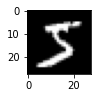

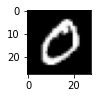

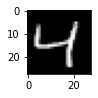

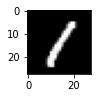

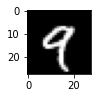

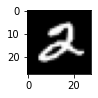

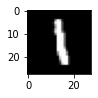

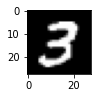

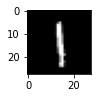

In [4]:
#loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
 
#plotting
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

### Reshaping the array Xtrain and ytrain, so that it has the same dimension as the one required by our model

In [37]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

### Printing the shape of Xtrain and Ytrain, to verify if its same as what we need in our model

In [6]:
#shape of dataset
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))


X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


## Label encoding
We need to give the y test and train in one hot encoded form

used this article for Label encoding - https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

it basically converts all the labels from 0 to the end. so that it becomes easier in one hot encoding.

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_train= label_encoder.fit_transform(y_train)
y_train
# y_train.unique()

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

#### Used the to_categorical function to convert the data to one hot encoded form

In [10]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = array(y_train)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
y_train = encoded

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Same for Y test

In [13]:
label_encoder = preprocessing.LabelEncoder()
y_test= label_encoder.fit_transform(y_test)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
# define example
data = array(y_test)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
y_test = encoded

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## SAVING CHECKPOINTS
We need to save the checkpoints of our model, in case any error occurs in between our training

i refered this article to save checkpoints - https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6

In [21]:
checkpoint_path = "E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq=20,
    verbose=1)

## Model
Importing required libraries

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Here we have created a function to create a CNN model by adding the following Layers
I have added 2 convolution layers, with filer size as 32. Padding as Same, and activation function as relu

one Max Pooling layer with pool size 2,2 and 1 Droupout to prevent overfitting

I have repeated the above archetecture with a filter size of 64, as with more layers, the model might perform better

Finally i have added a flatten layer to flatten the input, so that i can feed it to the dense layer.

I have then added the dense layer with relu as activation function.

At last i have added another dense layer with softmax as activation function because my final output has 60 classes. 

After this i have added the required optimizers and i have finally compiled the model

In [18]:
def create_model():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    optimizer = RMSprop(lr=0.001,
                        rho=0.9,
                        epsilon=1e-08,
                        decay=0.0)
    
    model.compile(optimizer = optimizer ,
                  loss = "categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#### Creating a Model

In [19]:
model_ckpt= create_model()

#### Setting the number of epochs and batch size

In [23]:
epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

## Data Augmentation
#### In data augmentation, we add a few image to the training dataset, with a little variation such as rotation or whitening and fliping of images. We do so, so that our model do not over fit.

#### Getting over fit means our model will get so much used to our training dataset, that its prediction on new images will be very faulty

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

#### We are finally running the model we have built, by giving all the attributes to the model.fit_generator function

In [25]:

history = model_ckpt.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 10,
                              validation_data = (x_test,y_test),
                              verbose = 2,
                              steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[cp_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD MIDAS\Task 2.2-MNIST\checkpoints\cp-0001.ckpt

Epoch 00001: saving model to E:\Internship\IIITD

### Calculating the final accuracy and loss

In [26]:
loss,acc = model_ckpt.evaluate(x_test,  y_test, verbose=2)

313/313 - 11s - loss: 0.0406 - accuracy: 0.9894


## Evaluation


### Plotting the loss and accuracy curves for training and validation

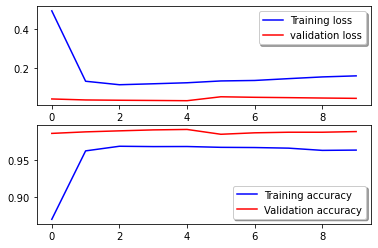

In [28]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [31]:
model = model_ckpt

### Plotting the Confusion matrix

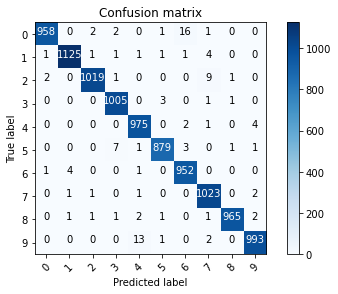

In [33]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 